In [1]:
import nltk

In [2]:
import glob,re,pickle,operator,math
import string

In [3]:
from nltk.tokenize import sent_tokenize

In [4]:
import num2words

In [5]:
#functions defined for preprocessing
def word_tokenization(text):
	from nltk.tokenize import word_tokenize
	from nltk.tokenize import RegexpTokenizer

	tokenized1=word_tokenize(text)
	return tokenized1


def punctuation(text):
	punctuated=[word.strip(string.punctuation) for word in text]
	return punctuated


def stopword_removal(text):
	from nltk.corpus import stopwords
	stopword=set(stopwords.words('english'))
	removed=[word for word in text if word not in stopword]
	return removed

def digit_removal(text):
	list2=[]
	list2=[re.sub(r"\d+","",str(word)) for word in text]
	return list2

def english_words(text):
	english_list=[ word for word in text if word in dict_english]
	return english_list

def lemmatization_words(text):
	list2=[]
	from nltk.stem import WordNetLemmatizer
	lemmatizer=WordNetLemmatizer()
	list2=[lemmatizer.lemmatize(word) for word in text]
	return list2

In [6]:
# Creating the dictionary for the word of each document 
#This dictionary stores the Term Frequency value for each word
#documents are given ids from 1 to 5000
#folder 1 (in sorted order i.e comp.graphics has documents from 1 to 1000)
#Last folder talk.politics.misc folder has document numbered from 4001 to 5000


filelist1=sorted(glob.glob(r"20_newsgroups//*"))
#print(filelist1)
filelist2=[]
for files in filelist1:
	#print(files[14:])
	filelist2.append(files[14:])

#print(filelist2)
#print(num2words.num2words(35))
# dict_vocab={}
dict_doc={}
list_docs=[]
dict_doc_raw={}
# #fp2=open("combined_text","w")
i=1
doc_length={}
for files in filelist2:
	files3=sorted(glob.glob(r"20_newsgroups//"+files+ r"//*"))
	#print(files3)
	#break
	for doc in files3:
		fp=open(doc,"r",encoding="Latin-1")
		text_doc=fp.read()
		text_doc=text_doc.lower()
		fp.close()
		#print(text_doc)
		#break
		tokenized=word_tokenization(text_doc)
		punctuated=punctuation(tokenized)
		#stopword_removed=stopword_removal(punctuated)
		stopword_removed=punctuated
		lemmatized=lemmatization_words(stopword_removed)
		text_digits=[num2words.num2words(int(word)) for word in lemmatized if word.isdigit()]
		text_wdigits=[word for word in lemmatized if not word.isdigit()]
		for word in text_digits:
			text_wdigits.append(word)
		text=text_wdigits
		doc_length[i]=len(text)
		dict_doc_raw[i]=text
		#text_set=set(text)
		text_dict={}
		for word in text:
			if word in text_dict:
				text_dict[word]+=1
			else:
				text_dict[word]=1
		#print(lemmatized)
		#hold=""
		#hold=hold.join(lemmatized)
		#fp2.write(hold)
		dict_doc[i]=text_dict 
		list_docs.append(i)  
		i+=1
	#break

In [7]:
print(len(dict_doc))

5000


In [8]:
#randomization is performed over the doc ids list inorder to divide the dataset randomly
import random
random.shuffle(list_docs)
print(list_docs)

[3984, 2671, 3292, 1221, 4830, 4422, 4240, 3455, 494, 838, 1474, 423, 720, 1503, 170, 236, 4578, 281, 2985, 4806, 1856, 948, 4657, 2433, 2621, 3657, 3294, 2201, 4283, 2997, 656, 1446, 966, 1994, 3601, 2076, 4272, 2884, 329, 4855, 1869, 438, 1909, 4676, 1350, 2083, 4232, 1764, 4826, 1719, 4907, 3062, 1929, 1915, 1414, 2211, 288, 717, 3602, 4605, 1886, 3357, 3001, 71, 953, 702, 471, 4737, 3799, 370, 700, 757, 3940, 4832, 2626, 1942, 2306, 3922, 2746, 3026, 3942, 888, 3035, 1219, 4365, 4054, 2907, 105, 3789, 582, 4694, 1816, 3535, 3104, 1492, 1544, 3174, 2327, 3433, 2032, 4837, 1675, 3200, 207, 4538, 1028, 2756, 3351, 3944, 3436, 2788, 1758, 2096, 1515, 4043, 2123, 3604, 4697, 2921, 2595, 233, 4883, 3585, 1406, 2054, 3710, 3753, 995, 2926, 1885, 1192, 2781, 2689, 2470, 4959, 156, 1802, 4564, 4705, 394, 663, 4619, 1547, 998, 3453, 4965, 2722, 4703, 4031, 2415, 1670, 4654, 4732, 388, 657, 2115, 1313, 3542, 3441, 3992, 909, 1375, 1163, 1500, 389, 678, 572, 4012, 4008, 4548, 81, 3437, 4964, 1

In [11]:
#splitting the data into 80:20
#splitting the data into 50:50 (in next part)
#splitting the data into 70:30 (in final part)
train=list_docs[:4000]
print((train))

test=list_docs[4000:]
print(len(test))


[3984, 2671, 3292, 1221, 4830, 4422, 4240, 3455, 494, 838, 1474, 423, 720, 1503, 170, 236, 4578, 281, 2985, 4806, 1856, 948, 4657, 2433, 2621, 3657, 3294, 2201, 4283, 2997, 656, 1446, 966, 1994, 3601, 2076, 4272, 2884, 329, 4855, 1869, 438, 1909, 4676, 1350, 2083, 4232, 1764, 4826, 1719, 4907, 3062, 1929, 1915, 1414, 2211, 288, 717, 3602, 4605, 1886, 3357, 3001, 71, 953, 702, 471, 4737, 3799, 370, 700, 757, 3940, 4832, 2626, 1942, 2306, 3922, 2746, 3026, 3942, 888, 3035, 1219, 4365, 4054, 2907, 105, 3789, 582, 4694, 1816, 3535, 3104, 1492, 1544, 3174, 2327, 3433, 2032, 4837, 1675, 3200, 207, 4538, 1028, 2756, 3351, 3944, 3436, 2788, 1758, 2096, 1515, 4043, 2123, 3604, 4697, 2921, 2595, 233, 4883, 3585, 1406, 2054, 3710, 3753, 995, 2926, 1885, 1192, 2781, 2689, 2470, 4959, 156, 1802, 4564, 4705, 394, 663, 4619, 1547, 998, 3453, 4965, 2722, 4703, 4031, 2415, 1670, 4654, 4732, 388, 657, 2115, 1313, 3542, 3441, 3992, 909, 1375, 1163, 1500, 389, 678, 572, 4012, 4008, 4548, 81, 3437, 4964, 1

In [17]:
#getting the data of training and testing docs
#creating the separate dictionary of terms for the training and testing docs
train_doc_dict={}
for val in train:
    train_doc_dict[val]=dict_doc[val]
print(len(train_doc_dict))

test_doc_dict={}
for val in test:
    test_doc_dict[val]=dict_doc[val]

print(len(test_doc_dict))

4000
1000


In [18]:
from tqdm.notebook import tqdm as tqdm

In [19]:
#creating combined vocabulary and class wise vocabulary
dict_vocab={}
dict_vocab_class={}
#iterating over the each doc in training set
for val in train:
    text_dict=train_doc_dict[val]
    for word in text_dict:
        if word in dict_vocab:
            dict_vocab[word]+=1
        else:
            dict_vocab[word]=1
    
    if val>=1 and val<=1000:
        if "comp.graphics" not in dict_vocab_class:
            dict_vocab_class["comp.graphics"]={}
            #adding the current doc documents to the dictionary of class 1
            for word in text_dict:
                if word in dict_vocab_class["comp.graphics"]:
                    hold=dict_vocab_class["comp.graphics"]
                    hold[word]+=1
                    dict_vocab_class["comp.graphics"]=hold
                else:
                    hold=dict_vocab_class["comp.graphics"]
                    hold[word]=1
                    dict_vocab_class["comp.graphics"]=hold
        else:
            
            for word in text_dict:
                if word in dict_vocab_class["comp.graphics"]:
                    hold=dict_vocab_class["comp.graphics"]
                    hold[word]+=1
                    dict_vocab_class["comp.graphics"]=hold
                else:
                    hold=dict_vocab_class["comp.graphics"]
                    hold[word]=1
                    dict_vocab_class["comp.graphics"]=hold
        
        
    elif val>=1001 and val<=2000:
        if "rec.sport.hockey" not in dict_vocab_class:
            dict_vocab_class["rec.sport.hockey"]={}
            #adding the current doc documents to the dictionary of class 2
            for word in text_dict:
                if word in dict_vocab_class["rec.sport.hockey"]:
                    hold=dict_vocab_class["rec.sport.hockey"]
                    hold[word]+=1
                    dict_vocab_class["rec.sport.hockey"]=hold
                else:
                    hold=dict_vocab_class["rec.sport.hockey"]
                    hold[word]=1
                    dict_vocab_class["rec.sport.hockey"]=hold
        else:
            
            for word in text_dict:
                if word in dict_vocab_class["rec.sport.hockey"]:
                    hold=dict_vocab_class["rec.sport.hockey"]
                    hold[word]+=1
                    dict_vocab_class["rec.sport.hockey"]=hold
                else:
                    hold=dict_vocab_class["rec.sport.hockey"]
                    hold[word]=1
                    dict_vocab_class["rec.sport.hockey"]=hold
    
    
    elif val>=2001 and val<=3000:
        if "sci.med" not in dict_vocab_class:
            dict_vocab_class["sci.med"]={}
            #adding the current doc documents to the dictionary of class 3
            for word in text_dict:
                if word in dict_vocab_class["sci.med"]:
                    hold=dict_vocab_class["sci.med"]
                    hold[word]+=1
                    dict_vocab_class["sci.med"]=hold
                else:
                    hold=dict_vocab_class["sci.med"]
                    hold[word]=1
                    dict_vocab_class["sci.med"]=hold
        else:
            
            for word in text_dict:
                if word in dict_vocab_class["sci.med"]:
                    hold=dict_vocab_class["sci.med"]
                    hold[word]+=1
                    dict_vocab_class["sci.med"]=hold
                else:
                    hold=dict_vocab_class["sci.med"]
                    hold[word]=1
                    dict_vocab_class["sci.med"]=hold
    
    elif val >=3001 and val<=4000:
        if "sci.space" not in dict_vocab_class:
            dict_vocab_class["sci.space"]={}
            #adding the current doc documents to the dictionary of class 4
            for word in text_dict:
                if word in dict_vocab_class["sci.space"]:
                    hold=dict_vocab_class["sci.space"]
                    hold[word]+=1
                    dict_vocab_class["sci.space"]=hold
                else:
                    hold=dict_vocab_class["sci.space"]
                    hold[word]=1
                    dict_vocab_class["sci.space"]=hold
        else:
            
            for word in text_dict:
                if word in dict_vocab_class["sci.space"]:
                    hold=dict_vocab_class["sci.space"]
                    hold[word]+=1
                    dict_vocab_class["sci.space"]=hold
                else:
                    hold=dict_vocab_class["sci.space"]
                    hold[word]=1
                    dict_vocab_class["sci.space"]=hold
    
    
    else:
        
        if "talk.politics" not in dict_vocab_class:
            dict_vocab_class["talk.politics"]={}
            #adding the current doc documents to the dictionary of class 5
            for word in text_dict:
                if word in dict_vocab_class["talk.politics"]:
                    hold=dict_vocab_class["talk.politics"]
                    hold[word]+=1
                    dict_vocab_class["talk.politics"]=hold
                else:
                    hold=dict_vocab_class["talk.politics"]
                    hold[word]=1
                    dict_vocab_class["talk.politics"]=hold
        else:
            
            for word in text_dict:
                if word in dict_vocab_class["talk.politics"]:
                    hold=dict_vocab_class["talk.politics"]
                    hold[word]+=1
                    dict_vocab_class["talk.politics"]=hold
                else:
                    hold=dict_vocab_class["talk.politics"]
                    hold[word]=1
                    dict_vocab_class["talk.politics"]=hold
        


In [20]:
print(len(dict_vocab))
print(len(dict_vocab_class['comp.graphics']))

72230
20366


In [21]:
#creating idf for each word document wise (the words in the training documents)
idf_dict={}
for word in tqdm(dict_vocab):
    count=0
    for doc in train:
        if word in train_doc_dict[doc]:
            count+=1
    
    idf=math.log(1+len(train)/(1+count))
    idf_dict[word]=idf


fp=open("idf_dict_A5","wb")
pickle.dump(idf_dict,fp)
fp.close()
    

In [22]:
fp=open("idf_dict_A5","rb")
idf_dict=pickle.load(fp)
fp.close()
#print(idf_dict['trusted'])

In [26]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [23]:
from tqdm.notebook import tqdm as tqdm

In [52]:
#function defined to calculate the cosine similarity of testing doc with each of the training docs
def cosine_similarity(doc_train,doc_test,length2,dict_vocab_class):
    cosine_sim={}
    for doc in doc_train:
        text=doc_train[doc]
        cls="comp.graphics"
        length_tr=0
        length_tst=0

        if doc>=1 and doc<=1000:
            cls="comp.graphics"
        elif doc>=1001 and doc<=2000:
            cls="rec.sport.hockey"
        elif doc>=2001 and doc<=3000:
            cls="sci.med"
        elif doc>=3001 and doc<=4000:
            cls="sci.space"
        else:
            cls="talk.politics"
            
        dot=0
        length1=len(dict_doc_raw[doc])
        for word in doc_test:
            
            if word in text and word in dict_vocab_class[cls] and word in idf_dict:
                idf=idf_dict[word]
                tf1=math.log(1+doc_test[word])
                tf2=math.log(1+text[word])
                dot+=tf1*idf*idf*tf2
                length_tr+=tf2*idf
                length_tst+=tf1*idf
            else:
                dot+=0
                
                
                
                
        

        score=dot/(length1*length2)
        
        cosine_sim[doc]=score
    #returning the cosine similarity score of all training docs corresponding to the testing document
    return cosine_sim


In [54]:
#applying MI feature selection
#The different values of N(example N11,N10 etc) are same as defined in Mutual Information Formula
dict_vocab_class2={}
for cls in tqdm(dict_vocab_class):
    text=dict_vocab_class[cls]
    dict_cls2={}
    k=0.6*len(text)
    for word in text:
        N00=0
        N01=0
        N10=0
        N11=0
        for doc in train_doc_dict:
            text2=train_doc_dict[doc]
            if word in text2:
                if doc>=1 and doc<=1000 and cls=="comp.graphics":
                    N11+=1
                elif doc>=1001 and doc<=2000 and cls=="rec.sport.hockey":
                    N11+=1
                elif doc>=2001 and doc<=3000 and cls=="sci.med":
                    N11+=1
                elif doc>=3001 and doc<=4000 and cls=="sci.space":
                    N11+=1
                elif doc>=4001 and doc<=5000 and cls=="talk.politics":
                    N11+=1
                else:
                    N10+=1
            else:
                if doc>=1 and doc<=1000 and cls=="comp.graphics":
                    N01+=1
                elif doc>=1001 and doc<=2000 and cls=="rec.sport.hockey":
                    N01+=1
                elif doc>=2001 and doc<=3000 and cls=="sci.med":
                    N01+=1
                elif doc>=3001 and doc<=4000 and cls=="sci.space":
                    N01+=1
                elif doc>=4001 and doc<=5000 and cls=="talk.politics":
                    N01+=1
                else:
                    N00+=1
        
        N1_= N10+N11
        N_1= N01 + N11
        N0_= N01 + N00
        N_0= N10 + N00
        
        N=len(train_doc_dict)
        mut_info=0
        if N>0 and N1_ >0 and N_1>0 and N_0>0 and N0_>0 and N11>0 and N00>0 and N10>0 and N01>0:
            mut_info=(N11/N) * ( math.log((N11*N)/(N1_*N_1))) + (N00/N) * ( math.log((N00*N)/(N0_*N_0))) + (N10/N) * ( math.log((N10*N)/(N1_*N_0))) + (N01/N) * ( math.log((N01*N)/(N0_*N_1)))
        dict_cls2[word]=mut_info
        
    #sorting the words on the basis of mutual information
    sorted_dict=dict((sorted(dict_cls2.items(), key =operator.itemgetter(1), reverse=True)))
    dict2={}
    #print(cls,word)
    #print(sorted_dict)
    #break
    i=1
    for val in sorted_dict:
        dict2[val]=text[val]
        
        if(i>=k):
            break
        
        i+=1
    #creating the new vocbulary for each class after feature selection
    dict_vocab_class2[cls]=dict2    


In [55]:
print(len(dict_vocab_class2["comp.graphics"]))

12220


In [56]:
#list to hold the score of knn algorithm for three different runs(k=1,3,5 )(after applying MI feature selection)
accuracy_mi_score=[]

In [60]:
#cosine similarity of query vector in test with doc vector in train
#actual and predicted class to be stored in separate lists
actual=[]
predicted=[]
#iterating over all the docs in testing set
for doc in tqdm(test):
    query=test_doc_dict[doc]
    length=len(dict_doc_raw[doc])
    cosine_sim=cosine_similarity(train_doc_dict,query,length,dict_vocab_class2)
    sorted_dict=dict((sorted(cosine_sim.items(), key =operator.itemgetter(1), reverse=True)))
    
    #the actual class of the document is stored in the actual list
    if doc>=1 and doc<=1000:
        actual.append("comp.graphics")
    elif doc>=1001 and doc<=2000:
        actual.append("rec.sport.hockey")
    elif doc>=2001 and doc<=3000:
        actual.append("sci.med")
    elif doc>=3001 and doc<=4000:
        actual.append("sci.space")
    else:
        actual.append("talk.politics")

    k=5 #taking the K to be 1,3 & 5 (FOR KNN)
    list_total=[]
    i=1
    #after applying the cosine similarity over the documents the aggregate class score is taken.
    #aggregate class score concept is taken from Manning's book 
    #the predicted class is the class having the highest aggregate score
    #the aggregation concept is basically applied to resolve the tie in case same number of documents similar to the tesing doc
    class_score={}
    for val in sorted_dict:
        if val>=1 and val<=1000:
            if "comp.graphics" in class_score:
                class_score["comp.graphics"]+=sorted_dict[val]
            else:
                class_score["comp.graphics"]=sorted_dict[val]
                        
        elif val>=1001 and val<=2000:
            if "rec.sport.hockey" in class_score:
                class_score["rec.sport.hockey"]+=sorted_dict[val]
            else:
                class_score["rec.sport.hockey"]=sorted_dict[val]
                
        elif val>=2001 and val<=3000:
            if "sci.med" in class_score:
                class_score["sci.med"]+=sorted_dict[val]
            else:
                class_score["sci.med"]=sorted_dict[val]
            
        elif val>=3001 and val<=4000:
            if "sci.space" in class_score:
                class_score["sci.space"]+=sorted_dict[val]
            else:
                class_score["sci.space"]=sorted_dict[val]
        else:
            if "talk.politics" in class_score:
                class_score["talk.politics"]+=sorted_dict[val]
            else:
                class_score["talk.politics"]=sorted_dict[val]
        
        if(i==k):
            break
        i+=1
    
    #print(class_score)
    #finally the class having highest score is added to the predicted list
    sorted_dict2=dict((sorted(class_score.items(), key =operator.itemgetter(1), reverse=True)))
    for val in sorted_dict2:
        predicted.append(val)
        break




In [61]:
print(sorted_dict2)

{'sci.med': 0.0485541311574013}


In [64]:
#sklearn is only used here to print the confusion matrix and accuracy score
from sklearn import metrics
confusion=metrics.confusion_matrix(actual, predicted, labels=["comp.graphics", "rec.sport.hockey", "sci.med","sci.space","talk.politics"])
print("Confusion matrix of KNN using Mututal Information feature Selection :")
print(confusion)
print("\n")
accuracy=metrics.accuracy_score(actual,predicted)
print("Accuracy of KNN using Mutual Information Feature Selection :")
print(accuracy)
accuracy_mi_score.append(accuracy)
print(accuracy_mi_score)

Confusion matrix of KNN using Mututal Information feature Selection :
[[182   9   7   3   0]
 [  3 203   3   0   0]
 [  8   2 177   2   2]
 [  5   3   4 184   1]
 [  2   7   2   2 189]]


Accuracy of KNN using Mutual Information Feature Selection :
0.935
[0.93, 0.935, 0.935]


Text(0, 0.5, 'Accuracy')

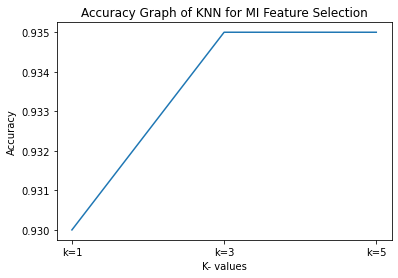

In [65]:
#run this code only after performing 3 iterations of running the knn code above with different values of k
accuracy_x=["k=1","k=3","k=5"]
from matplotlib import pyplot as plt
plt.title("Accuracy Graph of KNN for MI Feature Selection")
plt.plot(accuracy_x,accuracy_mi_score)
plt.xlabel("K- values")
plt.ylabel("Accuracy")

In [66]:
#Applying Tf-Idf Feature Selection
#considering each class as document
dict_vocab_class3={}
for cls in dict_vocab_class:
    vocab=dict_vocab_class[cls]
    dict2={}
    #top 60 percent features are collected from the class 
    k=0.6*len(vocab)
    for word in vocab:
        tf=vocab[word]
        df=0
        for cls2 in dict_vocab_class:
            if word in dict_vocab_class[cls2]:
                df+=1
                
        tf_idf=math.log(1+tf)*math.log(1+(5/(1+df)))
        dict2[word]=tf_idf
        
    sorted_dict=dict((sorted(dict2.items(), key =operator.itemgetter(1), reverse=True)))
    dict3={}
    i=1
    for val in sorted_dict:
        dict3[val]=vocab[val]
        
        if(i>=k):
            break
        
        i+=1
    
    dict_vocab_class3[cls]=dict3 
    

In [67]:
print(len(dict_vocab_class3["comp.graphics"]))

12220


In [68]:
accuracy_tf_idf=[]

In [69]:
#Applying knn on tf-idf feature selected values
actual=[]
predicted=[]
for doc in tqdm(test):
    query=test_doc_dict[doc]
    length=len(dict_doc_raw[doc])
    cosine_sim=cosine_similarity(train_doc_dict,query,length,dict_vocab_class3)
    sorted_dict=dict((sorted(cosine_sim.items(), key =operator.itemgetter(1), reverse=True)))
    
    if doc>=1 and doc<=1000:
        actual.append("comp.graphics")
    elif doc>=1001 and doc<=2000:
        actual.append("rec.sport.hockey")
    elif doc>=2001 and doc<=3000:
        actual.append("sci.med")
    elif doc>=3001 and doc<=4000:
        actual.append("sci.space")
    else:
        actual.append("talk.politics")

    k=5#taking the K to be 20 (FOR KNN)
    list_total=[]
    i=1
    class_score={}
    for val in sorted_dict:
        if val>=1 and val<=1000:
            if "comp.graphics" in class_score:
                class_score["comp.graphics"]+=sorted_dict[val]
            else:
                class_score["comp.graphics"]=sorted_dict[val]
                        
        elif val>=1001 and val<=2000:
            if "rec.sport.hockey" in class_score:
                class_score["rec.sport.hockey"]+=sorted_dict[val]
            else:
                class_score["rec.sport.hockey"]=sorted_dict[val]
                
        elif val>=2001 and val<=3000:
            if "sci.med" in class_score:
                class_score["sci.med"]+=sorted_dict[val]
            else:
                class_score["sci.med"]=sorted_dict[val]
            
        elif val>=3001 and val<=4000:
            if "sci.space" in class_score:
                class_score["sci.space"]+=sorted_dict[val]
            else:
                class_score["sci.space"]=sorted_dict[val]
        else:
            if "talk.politics" in class_score:
                class_score["talk.politics"]+=sorted_dict[val]
            else:
                class_score["talk.politics"]=sorted_dict[val]
        
        if(i==k):
            break
        i+=1
    
    #print(class_score)
    sorted_dict2=dict((sorted(class_score.items(), key =operator.itemgetter(1), reverse=True)))
    for val in sorted_dict2:
        predicted.append(val)
        break




In [70]:
print("Confusion Matrix of KNN using TF-IDF as Feature Selection : ")
confusion_tf=metrics.confusion_matrix(actual, predicted, labels=["comp.graphics", "rec.sport.hockey", "sci.med","sci.space","talk.politics"])
print(confusion_tf)
print("\n")
print("Accuracy of KNN using TF-IDF as Feature Selection : ")
accuracy_tf=metrics.accuracy_score(actual,predicted)
print(accuracy_tf)
accuracy_tf_idf.append(accuracy_tf)
#accuracy_tf_idf.pop()
print(accuracy_tf_idf)

Confusion Matrix of KNN using TF-IDF as Feature Selection : 
[[184   7   5   4   1]
 [  0 204   4   1   0]
 [  8   2 176   3   2]
 [  5   3   2 186   1]
 [  1   6   2   2 191]]


Accuracy of KNN using TF-IDF as Feature Selection : 
0.941
[0.941]


ValueError: x and y must have same first dimension, but have shapes (3,) and (1,)

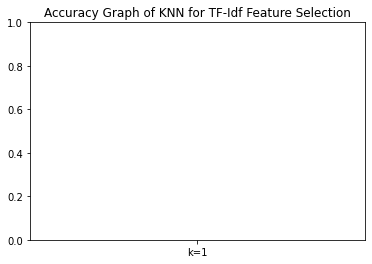

In [71]:
accuracy_x=["k=1","k=3","k=5"]
from matplotlib import pyplot as plt
plt.title("Accuracy Graph of KNN for TF-Idf Feature Selection")
plt.plot(accuracy_x,accuracy_tf_idf)
plt.xlabel("K- values")
plt.ylabel("Accuracy")